<a href="https://colab.research.google.com/github/FerBlanco25/text_mining_unrn/blob/main/Practica01_ferblanco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TEXT MINING

UNRN

Especialización en ciencias de datos aplicada


**PRACTICA_CLASE 2**

Preprocesamiento

Vamos a usa este dataset:
https://www.kaggle.com/datasets/patrickfleith/space-news-dataset?resource=download


In [ ]:
!pip install datasets transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is i

In [ ]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:

import pandas as pd

from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
# CAMBIAR EL LUGAR DEL PATH
# sino pueden  subir el archivo al notebook y usar directamente el nombre
file_path = "/content/drive/MyDrive/practica-20250329/practica/datasets/spacenews.csv"
df_news = pd.read_csv(file_path)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Muestra las primeras filas del DataFrame
df_news.head()

,title,url,content,author,date,postexcerpt
0,Electron launches first NASA PREFIRE Earth sci...,https://spacenews.com/electron-launches-first-...,LOS ANGELES — Rocket Lab launched the first of...,Jeff Foust,"May 25, 2024",NaN
1,Space Development Agency to procure dedicated ...,https://spacenews.com/space-development-agency...,WASHINGTON — T he Space Development Agency (S...,Sandra Erwin,"May 25, 2024",NaN
2,Bringing generative artificial intelligence to...,https://spacenews.com/bringing-generative-arti...,"TAMPA, Fla. — Amazon Web Services is busy posi...",Jason Rainbow,"May 24, 2024",NaN
3,SpaceX sets early June launch of next Starship...,https://spacenews.com/spacex-sets-early-june-l...,LOS ANGELES — SpaceX has set a June 5 launch d...,Jeff Foust,"May 24, 2024",NaN
4,NASA and Boeing moving ahead with Starliner te...,https://spacenews.com/nasa-and-boeing-moving-a...,LOS ANGELES — NASA and Boeing are preparing fo...,Jeff Foust,"May 24, 2024",NaN


In [ ]:
num_rows = df_news.shape[0]
print(f"The DataFrame has {num_rows} rows.")


The DataFrame has 20716 rows.


In [ ]:
num_cols = df_news.shape[1]
print(f"El DataFrame tiene {num_cols} columnas.")

El DataFrame tiene 6 columnas.


**Exploracion de la base**

In [ ]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20716 entries, 0 to 20715
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        20716 non-null  object
 1   url          20716 non-null  object
 2   content      20551 non-null  object
 3   author       20716 non-null  object
 4   date         20716 non-null  object
 5   postexcerpt  18196 non-null  object
dtypes: object(6)
memory usage: 971.2+ KB


In [ ]:
df_news.describe()

,title,url,content,author,date,postexcerpt
count,20716,20716,20551,20716,20716,18196
unique,20716,20715,20543,649,4367,18175
top,Championing a Climate Change for Commercial We...,https://spacenews.com/launcher-wins-space-forc...,,Jeff Foust,"October 1, 2011",FIRST UP Satcom is a weekly SpaceNews newslett...
freq,1,2,3,5293,178,3


El Count y Unique son iguales por lo tanto no hay duplicadas.

In [ ]:
# Encontrar filas duplicadas en base a todas las columnas
duplicate_rows_df = df_news[df_news.duplicated()]
duplicate_rows_df


,title,url,content,author,date,postexcerpt


In [ ]:
df_news.dropna(inplace=True)
#Recreate the dataframe index
df_news.reset_index(drop=True,inplace=True)
df_news.describe()

,title,url,content,author,date,postexcerpt
count,18032,18032,18032,18032,18032,18032
unique,18032,18031,18024,622,3852,18012
top,Foust Forward | Can bipartisan support for NAS...,https://spacenews.com/launcher-wins-space-forc...,,Jeff Foust,"October 1, 2011",FIRST UP Satcom is a weekly SpaceNews newslett...
freq,1,2,3,4394,167,3


(np.float64(-0.5), np.float64(1199.5), np.float64(1199.5), np.float64(-0.5))

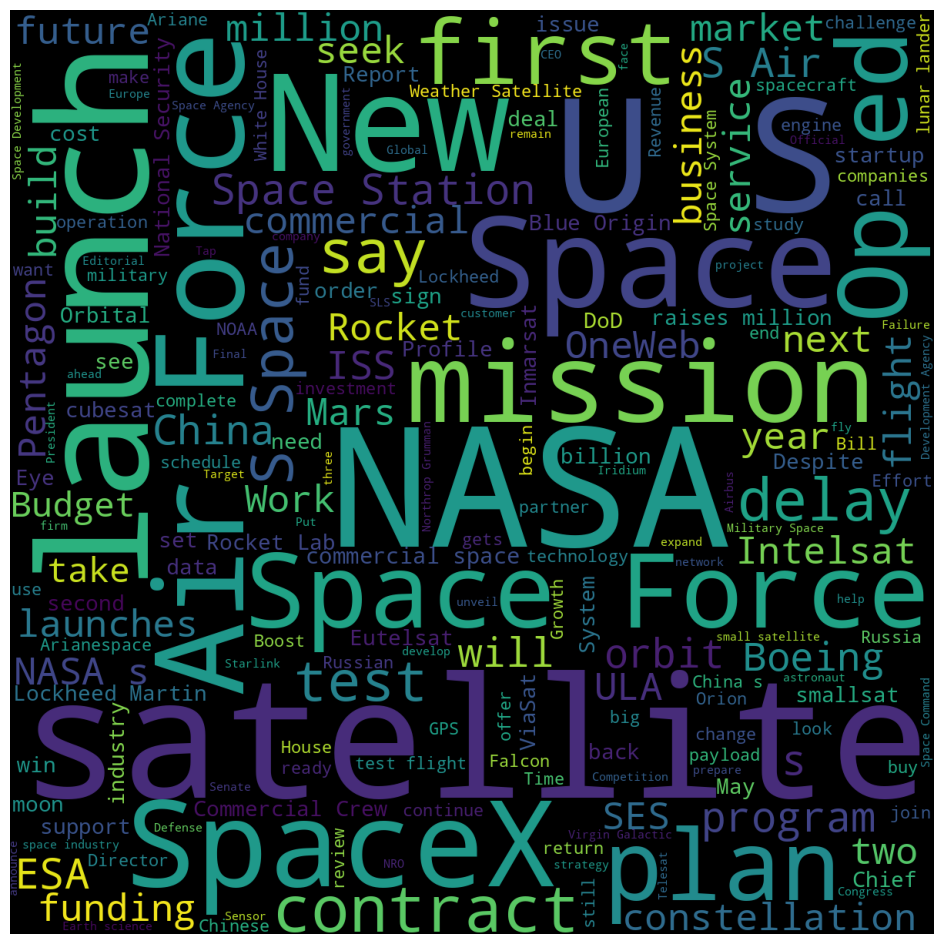

In [ ]:
from matplotlib.pyplot import subplots
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from wordcloud import WordCloud

# Check if 'Headline' column exists, if not, use 'title'
column_name = 'Headline' if 'Headline' in df_news.columns else 'title'

subplots(figsize=(12, 12))
imshow(X=WordCloud(random_state=2023, height=1200, width=1200).generate(text=' '.join(df_news[column_name].values.tolist())), )
axis('off')

**Preprocesamiento**

SEPARAR EN FRASES

Hay muchas maneras:

https://medium.com/@ravindul97/sentence-splitting-in-nlp-2948c90de4a2


In [ ]:
#OPCION 1 USANDO EXPRESIONES REGULARES
import re

def split_into_sentences(paragraph):
    # Regular expression pattern
    sentence_endings = r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?|\!)\s'
    sentences = re.split(sentence_endings, paragraph)
    return sentences

paragraph = "Rocket Lab launched the first of two NASA Earth science cubesats on an Electron rocket May 25, exactly seven years after the company’s first launch. The Electron lifted off from Rocket Lab’s Launch Complex 1 in New Zealand at 3:41 a.m. Eastern after a brief hold because of ground winds. It placed into a 525-kilometer sun-synchronous orbit a 6U cubesat that is part of a NASA mission called Polar Radiant Energy in the Far-InfraRed Experiment or PREFIRE. NASA announced it made contract with the PREFIRE cubesat five hours after liftoff, starting an in-orbit checkout of the satellite. It will be joined by a second, identical cubesat launched on another Electron. Both NASA and Rocket Lab said that launch will take place in the “coming days” but did not provide a specific date."
sentences = split_into_sentences(paragraph)
print(sentences)

['Rocket Lab launched the first of two NASA Earth science cubesats on an Electron rocket May 25, exactly seven years after the company’s first launch.', 'The Electron lifted off from Rocket Lab’s Launch Complex 1 in New Zealand at 3:41 a.m. Eastern after a brief hold because of ground winds.', 'It placed into a 525-kilometer sun-synchronous orbit a 6U cubesat that is part of a NASA mission called Polar Radiant Energy in the Far-InfraRed Experiment or PREFIRE.', 'NASA announced it made contract with the PREFIRE cubesat five hours after liftoff, starting an in-orbit checkout of the satellite.', 'It will be joined by a second, identical cubesat launched on another Electron.', 'Both NASA and Rocket Lab said that launch will take place in the “coming days” but did not provide a specific date.']


In [ ]:
#OPCION 1 USANDO el paquete de nltk
import nltk

nltk.download('punkt')
sentences = nltk.sent_tokenize(paragraph)

for sentence in sentences:
    print(sentence)

Rocket Lab launched the first of two NASA Earth science cubesats on an Electron rocket May 25, exactly seven years after the company’s first launch.
The Electron lifted off from Rocket Lab’s Launch Complex 1 in New Zealand at 3:41 a.m. Eastern after a brief hold because of ground winds.
It placed into a 525-kilometer sun-synchronous orbit a 6U cubesat that is part of a NASA mission called Polar Radiant Energy in the Far-InfraRed Experiment or PREFIRE.
NASA announced it made contract with the PREFIRE cubesat five hours after liftoff, starting an in-orbit checkout of the satellite.
It will be joined by a second, identical cubesat launched on another Electron.
Both NASA and Rocket Lab said that launch will take place in the “coming days” but did not provide a specific date.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Create a new variable containing the number of sentences in the summary
# Assuming your news text content is stored in the 'title' column
# If it's in a different column, replace 'title' with the correct column name
df_news['sum_sent_count'] = df_news['title'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [ ]:
# Create a new variable containing the number of sentences in the summary
# Assuming your news text content is stored in the 'title' column
# If it's in a different column, replace 'title' with the correct column name
# In this case, it should likely be 'text' if the original intent was to use the content of news articles
df_news['sum_sent_count'] = df_news['title'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [ ]:
df_news.head()

,title,url,content,author,date,postexcerpt,sum_sent_count
0,Orion splashes down to end Artemis 1,https://spacenews.com/orion-splashes-down-to-e...,Updated at 5:45 p.m. Eastern after post-splash...,Jeff Foust,"December 11, 2022",Fifty years to the day after the last Apollo m...,1
1,Polaris Dawn crewed mission could suffer addit...,https://spacenews.com/polaris-dawn-crewed-miss...,LAS VEGAS — A billionaire-backed private astro...,Jeff Foust,"October 25, 2022",A billionaire-backed private astronaut mission...,1
2,DART on track for asteroid collision,https://spacenews.com/dart-on-track-for-astero...,WASHINGTON — A NASA spacecraft is on course to...,Jeff Foust,"September 25, 2022",A NASA spacecraft is on course to deliberately...,1
3,U.S. Space Command calls for investment in tec...,https://spacenews.com/u-s-space-command-calls-...,"WASHINGTON — Lt. Gen. John Shaw, deputy comman...",Sandra Erwin,"August 31, 2022",U.S. Space Command's Lt. Gen. John Shaw said '...,1
4,SpaceX requests permission for direct-to-smart...,https://spacenews.com/spacex-requests-permissi...,"TAMPA, Fla. — SpaceX could provide “full and c...",Jason Rainbow,"December 8, 2022",SpaceX could provide “full and continuous” dir...,1


Histograma de la distribución del conteo de oraciones en los títulos de las noticias.

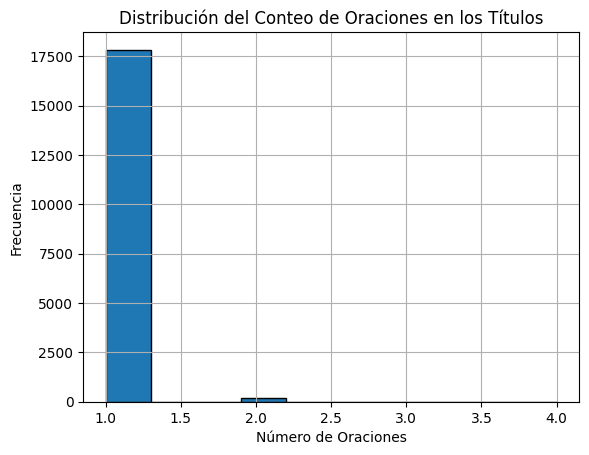

In [ ]:
import matplotlib.pyplot as plt

# Crear el histograma
plt.hist(df_news['sum_sent_count'], bins=10, edgecolor='black')

# Personalizar el gráfico
plt.title('Distribución del Conteo de Oraciones en los Títulos')
plt.xlabel('Número de Oraciones')
plt.ylabel('Frecuencia')
plt.grid(True)

# Mostrar el gráfico
plt.show()

SEPARAR EN PALABRAS

In [ ]:
paragraph = "Rocket Lab launched the first of two NASA Earth science cubesats on an Electron rocket May 25, exactly seven years after the company’s first launch. The Electron lifted off from Rocket Lab’s Launch Complex 1 in New Zealand at 3:41 a.m. Eastern after a brief hold because of ground winds. It placed into a 525-kilometer sun-synchronous orbit a 6U cubesat that is part of a NASA mission called Polar Radiant Energy in the Far-InfraRed Experiment or PREFIRE. NASA announced it made contract with the PREFIRE cubesat five hours after liftoff, starting an in-orbit checkout of the satellite. It will be joined by a second, identical cubesat launched on another Electron. Both NASA and Rocket Lab said that launch will take place in the “coming days” but did not provide a specific date."
words_split = re.split(r'[;,\s]\s*', paragraph)
print(words_split)

['Rocket', 'Lab', 'launched', 'the', 'first', 'of', 'two', 'NASA', 'Earth', 'science', 'cubesats', 'on', 'an', 'Electron', 'rocket', 'May', '25', 'exactly', 'seven', 'years', 'after', 'the', 'company’s', 'first', 'launch.', 'The', 'Electron', 'lifted', 'off', 'from', 'Rocket', 'Lab’s', 'Launch', 'Complex', '1', 'in', 'New', 'Zealand', 'at', '3:41', 'a.m.', 'Eastern', 'after', 'a', 'brief', 'hold', 'because', 'of', 'ground', 'winds.', 'It', 'placed', 'into', 'a', '525-kilometer', 'sun-synchronous', 'orbit', 'a', '6U', 'cubesat', 'that', 'is', 'part', 'of', 'a', 'NASA', 'mission', 'called', 'Polar', 'Radiant', 'Energy', 'in', 'the', 'Far-InfraRed', 'Experiment', 'or', 'PREFIRE.', 'NASA', 'announced', 'it', 'made', 'contract', 'with', 'the', 'PREFIRE', 'cubesat', 'five', 'hours', 'after', 'liftoff', 'starting', 'an', 'in-orbit', 'checkout', 'of', 'the', 'satellite.', 'It', 'will', 'be', 'joined', 'by', 'a', 'second', 'identical', 'cubesat', 'launched', 'on', 'another', 'Electron.', 'Both'

In [ ]:
words_split =nltk.word_tokenize(paragraph)
print(words_split)

['Rocket', 'Lab', 'launched', 'the', 'first', 'of', 'two', 'NASA', 'Earth', 'science', 'cubesats', 'on', 'an', 'Electron', 'rocket', 'May', '25', ',', 'exactly', 'seven', 'years', 'after', 'the', 'company', '’', 's', 'first', 'launch', '.', 'The', 'Electron', 'lifted', 'off', 'from', 'Rocket', 'Lab', '’', 's', 'Launch', 'Complex', '1', 'in', 'New', 'Zealand', 'at', '3:41', 'a.m.', 'Eastern', 'after', 'a', 'brief', 'hold', 'because', 'of', 'ground', 'winds', '.', 'It', 'placed', 'into', 'a', '525-kilometer', 'sun-synchronous', 'orbit', 'a', '6U', 'cubesat', 'that', 'is', 'part', 'of', 'a', 'NASA', 'mission', 'called', 'Polar', 'Radiant', 'Energy', 'in', 'the', 'Far-InfraRed', 'Experiment', 'or', 'PREFIRE', '.', 'NASA', 'announced', 'it', 'made', 'contract', 'with', 'the', 'PREFIRE', 'cubesat', 'five', 'hours', 'after', 'liftoff', ',', 'starting', 'an', 'in-orbit', 'checkout', 'of', 'the', 'satellite', '.', 'It', 'will', 'be', 'joined', 'by', 'a', 'second', ',', 'identical', 'cubesat', '

In [ ]:
df_news.head()

,title,url,content,author,date,postexcerpt,sum_sent_count
0,Orion splashes down to end Artemis 1,https://spacenews.com/orion-splashes-down-to-e...,Updated at 5:45 p.m. Eastern after post-splash...,Jeff Foust,2022-12-11,Fifty years to the day after the last Apollo m...,1
1,Polaris Dawn crewed mission could suffer addit...,https://spacenews.com/polaris-dawn-crewed-miss...,LAS VEGAS — A billionaire-backed private astro...,Jeff Foust,2022-10-25,A billionaire-backed private astronaut mission...,1
2,DART on track for asteroid collision,https://spacenews.com/dart-on-track-for-astero...,WASHINGTON — A NASA spacecraft is on course to...,Jeff Foust,2022-09-25,A NASA spacecraft is on course to deliberately...,1
3,U.S. Space Command calls for investment in tec...,https://spacenews.com/u-s-space-command-calls-...,"WASHINGTON — Lt. Gen. John Shaw, deputy comman...",Sandra Erwin,2022-08-31,U.S. Space Command's Lt. Gen. John Shaw said '...,1
4,SpaceX requests permission for direct-to-smart...,https://spacenews.com/spacex-requests-permissi...,"TAMPA, Fla. — SpaceX could provide “full and c...",Jason Rainbow,2022-12-08,SpaceX could provide “full and continuous” dir...,1


Tokenizer usando transformers (hugginface)


In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [ ]:
tokenizer(paragraph)

{'input_ids': [101, 17100, 14470, 2536, 1103, 1148, 1104, 1160, 9085, 2746, 2598, 22034, 28027, 1116, 1113, 1126, 2896, 10294, 19138, 8964, 1318, 1512, 117, 2839, 1978, 1201, 1170, 1103, 1419, 787, 188, 1148, 4286, 119, 1109, 2896, 10294, 19138, 3358, 1228, 1121, 17100, 14470, 787, 188, 26738, 9974, 122, 1107, 1203, 2512, 1120, 124, 131, 3746, 170, 119, 182, 119, 2882, 1170, 170, 4094, 2080, 1272, 1104, 1747, 7390, 119, 1135, 1973, 1154, 170, 3882, 1571, 118, 23387, 3336, 118, 188, 27250, 8167, 23038, 1361, 8895, 170, 127, 2591, 22034, 28027, 1115, 1110, 1226, 1104, 170, 9085, 2862, 1270, 25848, 16890, 10359, 1204, 5514, 1107, 1103, 8040, 118, 1130, 27476, 2069, 1174, 28009, 1137, 11629, 14663, 18172, 2036, 119, 9085, 1717, 1122, 1189, 2329, 1114, 1103, 11629, 14663, 18172, 2036, 22034, 28027, 1421, 2005, 1170, 6012, 5792, 117, 2547, 1126, 1107, 118, 8895, 4031, 3554, 1104, 1103, 5989, 119, 1135, 1209, 1129, 1688, 1118, 170, 1248, 117, 6742, 22034, 28027, 2536, 1113, 1330, 2896, 10294,

Ese será el input del modelo a entrenar cuando usemos un transformer.

Son varios pasos:

In [ ]:
tokens = tokenizer.tokenize(paragraph)

print(tokens)

['Rocket', 'Lab', 'launched', 'the', 'first', 'of', 'two', 'NASA', 'Earth', 'science', 'cube', '##sat', '##s', 'on', 'an', 'El', '##ec', '##tron', 'rocket', 'May', '25', ',', 'exactly', 'seven', 'years', 'after', 'the', 'company', '’', 's', 'first', 'launch', '.', 'The', 'El', '##ec', '##tron', 'lifted', 'off', 'from', 'Rocket', 'Lab', '’', 's', 'Launch', 'Complex', '1', 'in', 'New', 'Zealand', 'at', '3', ':', '41', 'a', '.', 'm', '.', 'Eastern', 'after', 'a', 'brief', 'hold', 'because', 'of', 'ground', 'winds', '.', 'It', 'placed', 'into', 'a', '52', '##5', '-', 'kilometer', 'sun', '-', 's', '##ync', '##hr', '##ono', '##us', 'orbit', 'a', '6', '##U', 'cube', '##sat', 'that', 'is', 'part', 'of', 'a', 'NASA', 'mission', 'called', 'Polar', 'Ra', '##dian', '##t', 'Energy', 'in', 'the', 'Far', '-', 'In', '##fra', '##R', '##ed', 'Experiment', 'or', 'PR', '##EF', '##IR', '##E', '.', 'NASA', 'announced', 'it', 'made', 'contract', 'with', 'the', 'PR', '##EF', '##IR', '##E', 'cube', '##sat', 'f

In [ ]:
ids = tokenizer.convert_tokens_to_ids(tokens)

print(ids)

[17100, 14470, 2536, 1103, 1148, 1104, 1160, 9085, 2746, 2598, 22034, 28027, 1116, 1113, 1126, 2896, 10294, 19138, 8964, 1318, 1512, 117, 2839, 1978, 1201, 1170, 1103, 1419, 787, 188, 1148, 4286, 119, 1109, 2896, 10294, 19138, 3358, 1228, 1121, 17100, 14470, 787, 188, 26738, 9974, 122, 1107, 1203, 2512, 1120, 124, 131, 3746, 170, 119, 182, 119, 2882, 1170, 170, 4094, 2080, 1272, 1104, 1747, 7390, 119, 1135, 1973, 1154, 170, 3882, 1571, 118, 23387, 3336, 118, 188, 27250, 8167, 23038, 1361, 8895, 170, 127, 2591, 22034, 28027, 1115, 1110, 1226, 1104, 170, 9085, 2862, 1270, 25848, 16890, 10359, 1204, 5514, 1107, 1103, 8040, 118, 1130, 27476, 2069, 1174, 28009, 1137, 11629, 14663, 18172, 2036, 119, 9085, 1717, 1122, 1189, 2329, 1114, 1103, 11629, 14663, 18172, 2036, 22034, 28027, 1421, 2005, 1170, 6012, 5792, 117, 2547, 1126, 1107, 118, 8895, 4031, 3554, 1104, 1103, 5989, 119, 1135, 1209, 1129, 1688, 1118, 170, 1248, 117, 6742, 22034, 28027, 2536, 1113, 1330, 2896, 10294, 19138, 119, 2695, 

In [ ]:
decoded_string = tokenizer.decode(ids)
print(decoded_string)

Rocket Lab launched the first of two NASA Earth science cubesats on an Electron rocket May 25, exactly seven years after the company ’ s first launch. The Electron lifted off from Rocket Lab ’ s Launch Complex 1 in New Zealand at 3 : 41 a. m. Eastern after a brief hold because of ground winds. It placed into a 525 - kilometer sun - synchronous orbit a 6U cubesat that is part of a NASA mission called Polar Radiant Energy in the Far - InfraRed Experiment or PREFIRE. NASA announced it made contract with the PREFIRE cubesat five hours after liftoff, starting an in - orbit checkout of the satellite. It will be joined by a second, identical cubesat launched on another Electron. Both NASA and Rocket Lab said that launch will take place in the “ coming days ” but did not provide a specific date.


**Normalización **

STOP WORDS

https://medium.com/data-science/text-pre-processing-stop-words-removal-using-different-libraries-f20bac19929a


In [ ]:
from nltk.corpus import stopwords
stops =  set(stopwords.words('english')+['com'])

In [ ]:
words = [word for word in paragraph.split() if word.lower() not in stops]
new_text = " ".join(words)
print(new_text)
print("Old length: ", len(paragraph))
print("New length: ", len(new_text))

Rocket Lab launched first two NASA Earth science cubesats Electron rocket May 25, exactly seven years company’s first launch. Electron lifted Rocket Lab’s Launch Complex 1 New Zealand 3:41 a.m. Eastern brief hold ground winds. placed 525-kilometer sun-synchronous orbit 6U cubesat part NASA mission called Polar Radiant Energy Far-InfraRed Experiment PREFIRE. NASA announced made contract PREFIRE cubesat five hours liftoff, starting in-orbit checkout satellite. joined second, identical cubesat launched another Electron. NASA Rocket Lab said launch take place “coming days” provide specific date.
Old length:  781
New length:  598


Fijense que tenemos mayúsculas

In [ ]:
new_text = new_text.lower()
new_text


'rocket lab launched first two nasa earth science cubesats electron rocket may 25, exactly seven years company’s first launch. electron lifted rocket lab’s launch complex 1 new zealand 3:41 a.m. eastern brief hold ground winds. placed 525-kilometer sun-synchronous orbit 6u cubesat part nasa mission called polar radiant energy far-infrared experiment prefire. nasa announced made contract prefire cubesat five hours liftoff, starting in-orbit checkout satellite. joined second, identical cubesat launched another electron. nasa rocket lab said launch take place “coming days” provide specific date.'

Desde la libreria de transformers se realiza como paso previo al tokenizer


In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
normalized_text=tokenizer.backend_tokenizer.normalizer.normalize_str(paragraph)
normalized_text

'rocket lab launched the first of two nasa earth science cubesats on an electron rocket may 25, exactly seven years after the company’s first launch. the electron lifted off from rocket lab’s launch complex 1 in new zealand at 3:41 a.m. eastern after a brief hold because of ground winds. it placed into a 525-kilometer sun-synchronous orbit a 6u cubesat that is part of a nasa mission called polar radiant energy in the far-infrared experiment or prefire. nasa announced it made contract with the prefire cubesat five hours after liftoff, starting an in-orbit checkout of the satellite. it will be joined by a second, identical cubesat launched on another electron. both nasa and rocket lab said that launch will take place in the “coming days” but did not provide a specific date.'

Lematización

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

ejemplo="play playing played plays car cars am are is better"

In [ ]:
words=ejemplo.split()
res=[]
for w in words:
    res.append([w,lemmatizer.lemmatize(w, pos='n'),
                lemmatizer.lemmatize(w, pos='v'),
                lemmatizer.lemmatize(w, pos='a')])
pd.DataFrame(res,columns=['word','noun','verb','adj'])


,word,noun,verb,adj
0,play,play,play,play
1,playing,playing,play,playing
2,played,played,play,played
3,plays,play,play,plays
4,car,car,car,car
5,cars,car,cars,cars
6,am,am,be,am
7,are,are,be,are
8,is,is,be,is
9,better,better,better,good


Ahora normalizo y tokenizo la base de datos

In [ ]:
df_news['Headline_tokens'] = df_news['title'].apply(lambda x: nltk.word_tokenize(x))

In [ ]:
# saco las stop words
df_news['Headline_tokens'] = df_news['Headline_tokens'].apply(lambda tokens: [word for word in tokens if word.lower() not in stops])


In [ ]:

df_news['Headline_tokens'] = df_news['Headline_tokens'].apply(lambda tokens: [word.lower() for word in tokens])


In [ ]:
df_news['Content_token'] = df_news['content'].apply(lambda x: nltk.word_tokenize(x))

In [ ]:
# saco las stop words
df_news['Content_token'] = df_news['Content_token'].apply(lambda tokens: [word for word in tokens if word.lower() not in stops])

In [ ]:
df_news['Content_token'] = df_news['Content_token'].apply(lambda tokens: [word.lower() for word in tokens])

In [ ]:
df_news.head()

,title,url,content,author,date,postexcerpt,sum_sent_count,Headline_tokens,Content_token
0,Orion splashes down to end Artemis 1,https://spacenews.com/orion-splashes-down-to-e...,Updated at 5:45 p.m. Eastern after post-splash...,Jeff Foust,2022-12-11,Fifty years to the day after the last Apollo m...,1,"[orion, splashes, end, artemis, 1]","[updated, 5:45, p.m., eastern, post-splashdown..."
1,Polaris Dawn crewed mission could suffer addit...,https://spacenews.com/polaris-dawn-crewed-miss...,LAS VEGAS — A billionaire-backed private astro...,Jeff Foust,2022-10-25,A billionaire-backed private astronaut mission...,1,"[polaris, dawn, crewed, mission, could, suffer...","[las, vegas, —, billionaire-backed, private, a..."
2,DART on track for asteroid collision,https://spacenews.com/dart-on-track-for-astero...,WASHINGTON — A NASA spacecraft is on course to...,Jeff Foust,2022-09-25,A NASA spacecraft is on course to deliberately...,1,"[dart, track, asteroid, collision]","[washington, —, nasa, spacecraft, course, deli..."
3,U.S. Space Command calls for investment in tec...,https://spacenews.com/u-s-space-command-calls-...,"WASHINGTON — Lt. Gen. John Shaw, deputy comman...",Sandra Erwin,2022-08-31,U.S. Space Command's Lt. Gen. John Shaw said '...,1,"[u.s., space, command, calls, investment, tech...","[washington, —, lt., gen., john, shaw, ,, depu..."
4,SpaceX requests permission for direct-to-smart...,https://spacenews.com/spacex-requests-permissi...,"TAMPA, Fla. — SpaceX could provide “full and c...",Jason Rainbow,2022-12-08,SpaceX could provide “full and continuous” dir...,1,"[spacex, requests, permission, direct-to-smart...","[tampa, ,, fla., —, spacex, could, provide, “,..."


Elijan un dataset de noticias de Kaggle:

https://www.kaggle.com/datasets?search=news


Y tratan de replicar las técnicas de preprocesamiento sobre alguno de los features.

También realicen analisis exploratorio.

Usen Chat GPT e internet.

